In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install scipy

In [3]:
import scipy.stats as stats

In [ ]:
plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [15]:
df = pd.read_csv ('data/penguins.csv')

In [17]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [18]:
df.mean()

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

In [19]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [42]:
df.bill_length_mm.mean()

43.99279279279281

In [43]:
df.bill_length_mm.min()

32.1

In [44]:
df.bill_length_mm.max()

59.6

<AxesSubplot:>

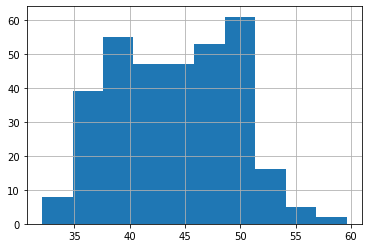

In [40]:
df.bill_length_mm.hist()

<AxesSubplot:>

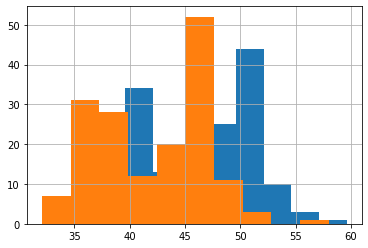

In [41]:
df [df.sex=='male'].bill_length_mm.hist()
df [df.sex=='female'].bill_length_mm.hist()

<AxesSubplot:title={'center':'bill_length_mm'}, xlabel='species'>

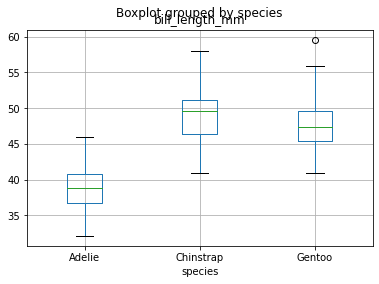

In [57]:
df.boxplot('bill_length_mm', by='species')

In [22]:
df.groupby('species').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


<AxesSubplot:xlabel='species'>

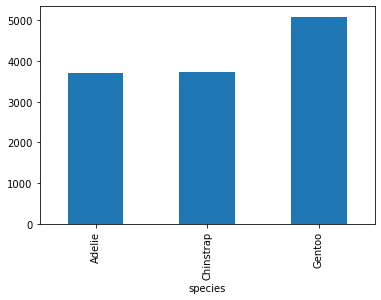

In [23]:
df.groupby('species').mean()['body_mass_g'].plot(kind='bar')

<AxesSubplot:title={'center':'body_mass_g'}, xlabel='species'>

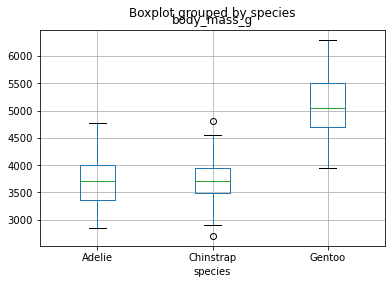

In [24]:
df.boxplot('body_mass_g', by='species')

In [21]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single nu

Text(0, 0.5, 'body_mass_g')

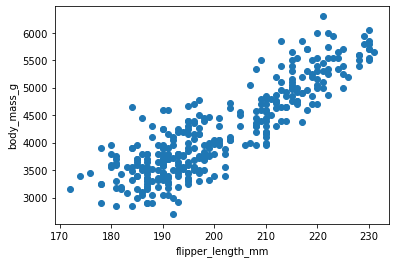

In [26]:
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.gca().set_xlabel('flipper_length_mm')
plt.gca().set_ylabel('body_mass_g')

In [27]:
import seaborn as sns

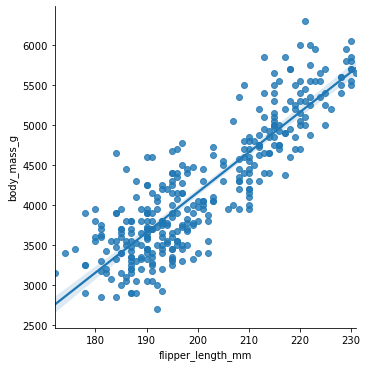

In [30]:
sns.lmplot(data=df, x='flipper_length_mm', y='body_mass_g')

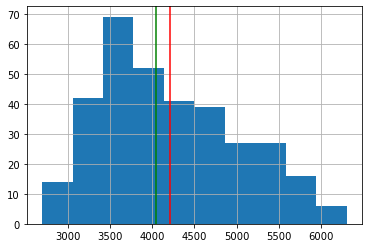

In [33]:
df['body_mass_g'].hist()
plt.axvline(df['body_mass_g'].mean(), color='r')
plt.axvline(df['body_mass_g'].median(), color='g')

In [32]:
df['body_mass_g'].mean()

4207.057057057057

<AxesSubplot:xlabel='island', ylabel='count'>

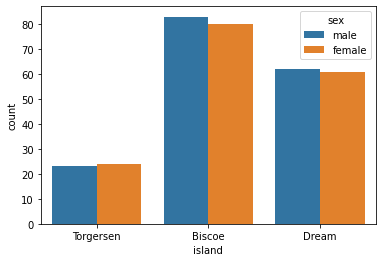

In [45]:
sns.countplot(data=df, x='island', hue='sex')

<AxesSubplot:xlabel='species,sex'>

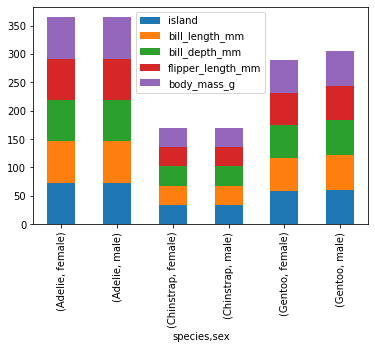

In [48]:
df.groupby(['species','sex']).count().plot(kind='bar', stacked=True)

In [50]:
pd.crosstab(df['species'], df['sex'])

sex,female,male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


<AxesSubplot:xlabel='sex', ylabel='species'>

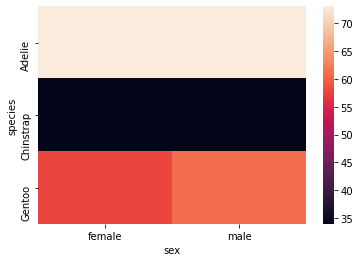

In [56]:
sns.heatmap(pd.crosstab(df['species'], df['sex']))

<AxesSubplot:xlabel='sex', ylabel='species'>

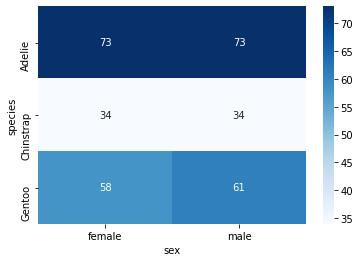

In [55]:
sns.heatmap(pd.crosstab(df['species'], df['sex']), annot=True, cmap='Blues')